# Neural Network Course First Project

In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("Bias_correction_ucl.csv")

In [25]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


### Data Processing

In [26]:
df = df.dropna()

In [27]:
df = df.drop(columns=['Date'])

In [28]:
X = df.iloc[:, 0:-12]
y_max = df.iloc[:, -2]
y_min = df.iloc[:, -1]

In [41]:
y_max = np.array(y_max)
y_min = np.array(y_min)

In [44]:
y_max = y_max.reshape(-1, 1)
y_min = y_min.reshape(-1, 1)

In [45]:
# Scaling
PredictorScaler=StandardScaler()
TargetVarScaler_Max=StandardScaler()
TargetVarScaler_Min=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit_Max=TargetVarScaler_Max.fit(y_max)
TargetVarScalerFit_Min=TargetVarScaler_Min.fit(y_min)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y_max=TargetVarScalerFit_Max.transform(y_max)
y_min=TargetVarScalerFit_Min.transform(y_min)

### Maximum Temperature

In [46]:
X_train, X_test, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)

In [52]:
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 177,301
Trainable params: 177,301
Non-trainable params: 0
_________________________________________________________________


In [53]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [54]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [55]:
history = model.fit(X_train, y_train_max,
                    validation_data = (X_test, y_test_max),
                    callbacks=[es],
                    epochs=50,
                    batch_size=50,
                    verbose=1)

Epoch 1/50
122/122 [==============================] - 2s 6ms/step - loss: 0.3146 - mae: 0.4281 - val_loss: 0.2226 - val_mae: 0.3711
Epoch 2/50
122/122 [==============================] - 0s 4ms/step - loss: 0.1840 - mae: 0.3327 - val_loss: 0.1712 - val_mae: 0.3204
Epoch 3/50
122/122 [==============================] - 0s 4ms/step - loss: 0.1551 - mae: 0.3077 - val_loss: 0.1668 - val_mae: 0.3179
Epoch 4/50
122/122 [==============================] - 0s 4ms/step - loss: 0.1423 - mae: 0.2912 - val_loss: 0.1424 - val_mae: 0.2895
Epoch 5/50
122/122 [==============================] - 0s 4ms/step - loss: 0.1146 - mae: 0.2612 - val_loss: 0.2231 - val_mae: 0.3741
Epoch 6/50
122/122 [==============================] - 0s 4ms/step - loss: 0.1047 - mae: 0.2489 - val_loss: 0.1307 - val_mae: 0.2825
Epoch 7/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0933 - mae: 0.2342 - val_loss: 0.1184 - val_mae: 0.2652
Epoch 8/50
122/122 [==============================] - 1s 6ms/step - loss: 0.

### Evaluating Max Temperature Model

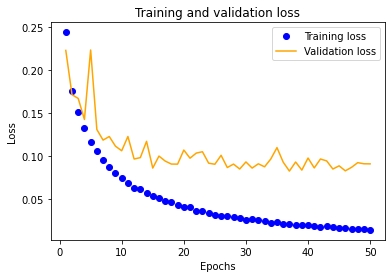

In [58]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

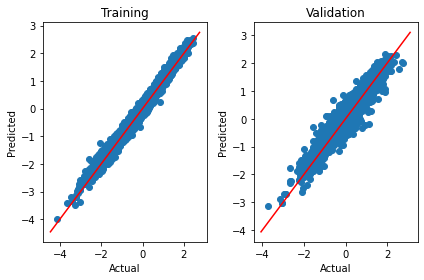

In [59]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train_max, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test_max, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [61]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train_max, trainpreds)) # train
print(mean_absolute_error(y_test_max, pred)) # test

0.0986777420251561
0.23145665358473821
